In [6]:
import matplotlib
from utils.OddsData import *
from utils.Features import *
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


## Read Data

In [7]:
data_df = read_odds(countries='all')
data_df = remove_nan_vals(data_df)
# data_df = drop_bookies(data_df)
# data_df = drop_date_time(data_df)
data_df["Date"] = pd.to_datetime(data_df["Date"])
data_df = transform_odds_to_probs(data_df)
data_df = drop_duplicates(data_df)
# data_df = data_df.drop(['Country'], axis=1)
# data_df.drop_duplicates(inplace=True)
data_df.describe()

,FTHG,FTAG,HT1HG,HT1AG,HT2HG,HT2AG,HO_bet-at-home,DO_bet-at-home,AO_bet-at-home,HC_bet-at-home,...,AO_WilliamHill,HC_WilliamHill,DC_WilliamHill,AC_WilliamHill,HO_ComeOn,DO_ComeOn,AO_ComeOn,HC_ComeOn,DC_ComeOn,AC_ComeOn
count,48820.000000,48820.000000,48820.000000,48820.000000,48820.000000,48820.000000,48820.000000,48820.000000,48820.000000,48820.000000,...,48820.000000,48820.000000,48820.000000,48820.000000,48820.000000,48820.000000,48820.000000,48820.000000,48820.000000,48820.000000
mean,1.492565,1.214072,0.662106,0.535027,0.830459,0.679045,0.469979,0.291537,0.337521,0.465270,...,0.332549,0.457722,0.286977,0.330371,0.467460,0.286059,0.333086,0.458857,0.282277,0.328757
std,1.266787,1.139861,0.823940,0.738695,0.922016,0.838844,0.134186,0.036485,0.121420,0.144934,...,0.122100,0.143684,0.036371,0.129799,0.135978,0.034107,0.122906,0.147768,0.038729,0.132782
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050761,0.073692,0.027108,0.045455,...,0.019608,0.034483,0.047619,0.024390,0.041806,0.071429,0.025157,0.038462,0.048780,0.025381
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.384615,0.280112,0.255102,0.367647,...,0.250000,0.363636,0.277778,0.238095,0.384615,0.275482,0.250000,0.357143,0.266667,0.238095
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.460829,0.298507,0.327869,0.456621,...,0.322581,0.444444,0.294118,0.322581,0.458716,0.294118,0.322581,0.452489,0.289855,0.317460
75%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.555556,0.310559,0.403226,0.555556,...,0.400000,0.546448,0.312500,0.400000,0.546448,0.304878,0.400000,0.550209,0.307692,0.401606
max,12.000000,10.000000,7.000000,6.000000,7.000000,6.000000,0.943396,0.800000,0.952381,0.970874,...,0.961538,0.980392,0.617284,0.961538,0.980392,0.458716,0.925926,0.970874,0.598802,0.952381


## Add features

In [8]:
print('Adding Last Close')
data_df = calculate_last_close_feature(data_df)

print('Adding Last FTR')
data_df = calculate_last_ftr_feature(data_df)

print('Adding MMR')
data_df = calculate_mmr_feature(data_df)

print('Adding Points')
data_df = calculate_points_feature(data_df, num_matches=5)
data_df = calculate_points_feature(data_df, num_matches=10)
data_df = calculate_points_feature(data_df, num_matches=15)

print('Adding Realized EV')
data_df = calculate_realized_ev_feature(data_df, num_matches=3)
data_df = calculate_realized_ev_feature(data_df, num_matches=5)
data_df = calculate_realized_ev_feature(data_df, num_matches=9)

print('Adding Shock')
data_df = calculate_shock_feature(data_df, num_matches=1)
data_df = calculate_shock_feature(data_df, num_matches=3)
data_df = calculate_shock_feature(data_df, num_matches=5)

print('Adding Winstreak')
data_df = calculate_win_streak_feature(data_df)

data_df

Adding Last Close
Adding Last FTR
Adding MMR
Adding Points
Adding Realized EV
Adding Shock
Adding Winstreak


,Country,League,H_team,A_team,Date,Time,FTHG,FTAG,HT1HG,HT1AG,...,H_9EVs,A_9EVs,H_1shock,A_1shock,H_3shock,A_3shock,H_5shock,A_5shock,H_winstreak,A_winstreak
0,germany,3-liga,AlemanniaAachen,PreussenMunster,2012-09-25,18:00:00,1,2,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
1,germany,3-liga,ArminiaBielefeld,Chemnitzer,2012-09-25,18:00:00,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2,germany,2-bundesliga,EnergieCottbus,Paderborn,2012-09-25,16:30:00,2,1,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
3,germany,2-bundesliga,FCKoln,FSVFrankfurt,2012-09-25,16:30:00,2,1,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
4,england,national-league,CambridgeUtd,Kidderminster,2012-09-25,19:45:00,1,3,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48815,england,league-two,Walsall,Crawley,2022-11-19,15:00:00,2,1,1,1,...,-1.805081,-3.566225,0.288184,0.695122,1.762884,1.197562,2.083843,3.004507,2,3
48816,england,national-league,YorkCity,Wealdstone,2022-11-19,15:00:00,1,2,1,0,...,-3.457133,-4.652999,-0.481162,0.150830,-1.400217,-0.232407,-2.014425,-1.977025,-3,1
48817,england,league-one,Burton,Plymouth,2022-11-19,15:00:00,2,2,1,0,...,-3.739979,1.758084,0.355872,-0.383142,0.671257,0.365279,0.632352,1.780395,-2,11
48818,england,league-one,BristolRovers,Peterborough,2022-11-19,15:00:00,1,0,0,0,...,-3.126201,1.576642,-0.500000,-0.669260,-0.463553,-0.035727,1.842694,-0.569305,-1,-1


In [55]:
draw_cnt = len(data_df[data_df["FTHG"] == data_df["FTAG"]])
draw_cnt / len(data_df)

0.2604260548955346

## Drop Results columns

In [9]:
data_df_copy = data_df.copy()

In [10]:
data_df = data_df_copy.copy()

In [11]:
# import math
#
#
# def normalize_date(str_val):
#     if type(str_val) != str and math.isnan(str_val):
#         return None
#     vals = str_val.split("/")
#     assert len(vals) == 3
#     year = vals[-1]
#     if len(year) == 2:
#         if int(year) < 70:
#             year = "20" + year
#         else:
#             year = "19" + year
#     return f"{vals[0]}/{vals[1]}/{year}"
#
#
# #1.3333
# mmr_england_df = pd.read_csv("raw_data/englandm.csv")
# mmr_germany_df = pd.read_csv("raw_data/germanym.csv")
# mmr_sweden_df = pd.read_csv("raw_data/sweden.csv")
# mmr_italy_df = pd.read_csv("raw_data/italym.csv")
# print("Additional data loaded")
# mmr_england_df.Date = mmr_england_df.Date.apply(normalize_date)
# mmr_england_df.Date = pd.to_datetime(mmr_england_df.Date, format="%d/%m/%Y")
# mmr_germany_df.Date = mmr_germany_df.Date.apply(normalize_date)
# mmr_germany_df.Date = pd.to_datetime(mmr_germany_df.Date, format="%d/%m/%Y")
# mmr_italy_df.Date = mmr_italy_df.Date.apply(normalize_date)
# mmr_italy_df.Date = pd.to_datetime(mmr_italy_df.Date, format="%d/%m/%Y")
# mmr_sweden_df.Date = mmr_sweden_df.Date.apply(normalize_date)
# # mmr_sweden_df.Date = pd.to_datetime(mmr_sweden_df.Date, format="%d/%m/%Y")

In [12]:
# main_teams = set(data_df["H_team"]).union(data_df["A_team"])
# filt = lambda x: [i for i in x if not i.startswith("Unnamed:")]
# england_c = filt(mmr_england_df.columns)
# germany_c = filt(mmr_germany_df.columns)
# sweden_c = filt(mmr_sweden_df.columns)
# italy_c = filt(mmr_italy_df.columns)
# res = np.concatenate([
#     mmr_england_df[["HomeTeam", "AwayTeam", "Date", "FTHG", "FTAG"]].values,
#     mmr_germany_df[["HomeTeam", "AwayTeam", "Date", "FTHG", "FTAG"]].values,
#     mmr_italy_df[["HomeTeam", "AwayTeam", "Date", "FTHG", "FTAG"]].values,
#     mmr_sweden_df[["Home", "Away", "Date", "HG", "AG"]].values,
# ])
# mmr_df = pd.DataFrame(data=res, columns=["Home", "Away", "Date", "FTHG", "FTAG"])
# mmr_teams = set(mmr_df["Home"]).union(set(mmr_df["Away"]))
# mmr_teams = set([x.lower() for x in mmr_teams if type(x) is str])
# england_teams = set(mmr_england_df["HomeTeam"]).union(set(mmr_england_df["AwayTeam"]))
# england_teams = set([x.lower() for x in england_teams if type(x) is str])
# data_teams = set(data_df["H_team"]).union(set(data_df["A_team"]))
# data_teams = set([x.lower() for x in data_teams if type(x) is str])
#
# k = data_df[data_df["Country"] == "england"]
# leagues = ["league-one", "championship", "premier-league", "league-two"]
#
# k = k[k["League"].isin(leagues)]
# k_teams = set(k["H_team"]).union(set(k["A_team"]))
# k_teams = set([x.lower().replace(" ", "") for x in k_teams if type(x) is str])
# k_teams ^ england_teams

In [13]:
# data_df = data_df.drop(['FTHG', 'FTAG', 'HT1HG', 'HT1AG', 'HT2HG', 'HT2AG'], axis=1)
# data_df

In [14]:
# data_df.loc[data_df['League'] == 'premier-league'].reset_index(drop=True)
#premier_league_df

In [15]:
#data_df = data_df.loc[data_df['League'] != 'premier-league'].reset_index(drop=True)
#data_df

## Let's try and drop teams

`Idea`: Maybe MMR is a good proxy for team!

Let's also drop the country for good measure...

In [16]:
# data_without_teams_df = data_df.drop(['H_team', 'A_team', 'Country'], axis=1)
data_without_teams_df = data_df

## Let's one-hot encode league

The NN can't handle categorical features and league gives context to the MMR

In [17]:
# from sklearn.preprocessing import OneHotEncoder

# #creating instance of one-hot-encoder
# encoder = OneHotEncoder()

# #perform one-hot encoding on 'League' column
# encoder_df = pd.DataFrame(encoder.fit_transform(data_without_teams_df[['League']]).toarray())
# # encoder_df

# # #merge one-hot encoded columns back with original DataFrame
# data_without_teams_df = data_without_teams_df.join(encoder_df)

# data_without_teams_df = data_without_teams_df.drop(['League'], axis=1)
# data_without_teams_df

In [18]:
data_without_teams_df

,Country,League,H_team,A_team,Date,Time,FTHG,FTAG,HT1HG,HT1AG,...,H_9EVs,A_9EVs,H_1shock,A_1shock,H_3shock,A_3shock,H_5shock,A_5shock,H_winstreak,A_winstreak
0,germany,3-liga,AlemanniaAachen,PreussenMunster,2012-09-25,18:00:00,1,2,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
1,germany,3-liga,ArminiaBielefeld,Chemnitzer,2012-09-25,18:00:00,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2,germany,2-bundesliga,EnergieCottbus,Paderborn,2012-09-25,16:30:00,2,1,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
3,germany,2-bundesliga,FCKoln,FSVFrankfurt,2012-09-25,16:30:00,2,1,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
4,england,national-league,CambridgeUtd,Kidderminster,2012-09-25,19:45:00,1,3,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48815,england,league-two,Walsall,Crawley,2022-11-19,15:00:00,2,1,1,1,...,-1.805081,-3.566225,0.288184,0.695122,1.762884,1.197562,2.083843,3.004507,2,3
48816,england,national-league,YorkCity,Wealdstone,2022-11-19,15:00:00,1,2,1,0,...,-3.457133,-4.652999,-0.481162,0.150830,-1.400217,-0.232407,-2.014425,-1.977025,-3,1
48817,england,league-one,Burton,Plymouth,2022-11-19,15:00:00,2,2,1,0,...,-3.739979,1.758084,0.355872,-0.383142,0.671257,0.365279,0.632352,1.780395,-2,11
48818,england,league-one,BristolRovers,Peterborough,2022-11-19,15:00:00,1,0,0,0,...,-3.126201,1.576642,-0.500000,-0.669260,-0.463553,-0.035727,1.842694,-0.569305,-1,-1


## Split the Data: Train, Val, Test

In [19]:
columns = ['H_LastFTG', 'A_LastFTG', 'H_MMR', 'A_MMR', 'H_5Points', 'A_5Points', 'H_10Points', 'A_10Points',
           'H_15Points', 'A_15Points', 'H_3EVs',
           'A_3EVs', 'H_5EVs', 'A_5EVs', 'H_9EVs', 'A_9EVs', 'H_1shock',
           'A_1shock', 'H_3shock', 'A_3shock', 'H_5shock', 'A_5shock',
           'H_winstreak', 'A_winstreak']
all_columns = ['AO_Pinnacle', 'A_LastOdds', 'DO_Pinnacle', 'HO_Pinnacle', 'H_LastOdds', *columns]
#
# fg_columns = all_columns.copy()
# fg_columns.remove("H_elo")
# fg_columns.remove("A_elo")
# fg_columns.append("Date")

In [407]:
# columns = ['H_LastFTG', 'A_LastFTG', 'H_elo', 'A_elo', 'H_winstreak', 'A_winstreak', 'H_1shock',
#            'A_1shock', 'H_3shock', 'A_3shock', 'H_5shock', 'A_5shock', ]
# drop_later_columns = ['H_team', 'A_team', 'FTHG', 'FTAG']
# all_columns = ['AO_Pinnacle', 'A_LastOdds', 'DO_Pinnacle', 'HO_Pinnacle', 'H_LastOdds', *columns, *drop_later_columns]

In [21]:
data_for_splitting = data_without_teams_df.copy()
data_for_splitting["H_elo"] = -1
data_for_splitting["A_elo"] = -1
# training_df = data_for_splitting
# # training_df = data_for_splitting.loc[data_for_splitting['League'] != 'premier-league']
# # training_df = training_df.drop(['League'], axis=1)
#
# train_size = 0.85
# val_size = 0.15
#
# assert train_size + val_size == 1.0
#
# train_index = int(len(training_df) * train_size)
# df_train = training_df[0:train_index]
# df_valid = training_df[train_index:]
#
# target_columns = ['HC_Pinnacle', 'DC_Pinnacle', 'AC_Pinnacle']
#
# X, y = training_df[all_columns], training_df[target_columns]
# X_train, y_train = df_train[all_columns].copy(), df_train[target_columns].copy()
# X_valid, y_valid = df_valid[all_columns].copy(), df_valid[target_columns].copy()

In [22]:
data_for_splitting[all_columns]

,AO_Pinnacle,A_LastOdds,DO_Pinnacle,HO_Pinnacle,H_LastOdds,H_LastFTG,A_LastFTG,H_MMR,A_MMR,H_5Points,...,H_9EVs,A_9EVs,H_1shock,A_1shock,H_3shock,A_3shock,H_5shock,A_5shock,H_winstreak,A_winstreak
0,0.411523,0.411523,0.297619,0.326797,0.324675,0,0,26.300000,25.000000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
1,0.292398,0.284091,0.292398,0.450450,0.446429,0,0,26.300000,25.000000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2,0.274725,0.274725,0.278552,0.476190,0.452489,0,0,26.300000,25.000000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
3,0.253807,0.223214,0.285714,0.490196,0.540541,0,0,26.300000,25.000000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
4,0.285714,0.316456,0.280899,0.462963,0.436681,0,0,26.300000,25.000000,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48815,0.220264,0.495050,0.285714,0.529101,0.241546,0,1,25.078460,23.682778,8,...,-1.805081,-3.566225,0.288184,0.695122,1.762884,1.197562,2.083843,3.004507,2,3
48816,0.232558,0.254453,0.255102,0.558659,0.502513,0,0,25.307873,24.230512,2,...,-3.457133,-4.652999,-0.481162,0.150830,-1.400217,-0.232407,-2.014425,-1.977025,-3,1
48817,0.409836,0.452489,0.274725,0.375940,0.297619,0,0,25.045571,26.721217,5,...,-3.739979,1.758084,0.355872,-0.383142,0.671257,0.365279,0.632352,1.780395,-2,11
48818,0.456621,0.584795,0.262467,0.314465,0.203666,0,0,26.061703,25.060124,6,...,-3.126201,1.576642,-0.500000,-0.669260,-0.463553,-0.035727,1.842694,-0.569305,-1,-1


In [40]:
import hopsworks

project = hopsworks.login()
fs = project.get_feature_store()
fg_football = fs.get_or_create_feature_group(
    name="fg_football",
    version=1,
    primary_key=[],
    description="Processed titanic survivors dataset")

ImportError: cannot import name 'contextfilter' from 'jinja2' (C:\Users\matfr\miniconda3\envs\serverless-ml\lib\site-packages\jinja2\__init__.py)

In [23]:
finetuning_df = data_for_splitting  #.loc[data_for_splitting['League'] == 'premier-league']
# finetuning_df = finetuning_df.drop(['League'], axis=1)

throwaway_size = 0.2
train_size = 0.5
val_size = 0.15
test_size = 0.15

assert throwaway_size + train_size + val_size + test_size == 1.0

throwaway_index = int(len(finetuning_df) * throwaway_size)
train_index = throwaway_index + int(len(finetuning_df) * train_size)
val_index = train_index + int(len(finetuning_df) * val_size)
df_train = finetuning_df[throwaway_index:train_index]
df_valid = finetuning_df[train_index:val_index]
df_test = finetuning_df[val_index:]

target_columns = ['HC_Pinnacle', 'DC_Pinnacle', 'AC_Pinnacle']

X_finetuning, y_finetuning = finetuning_df[all_columns].copy(), finetuning_df[target_columns].copy()
X_finetuning_train, y_finetuning_train = df_train[all_columns].copy(), df_train[target_columns].copy()
X_finetuning_valid, y_finetuning_valid = df_valid[all_columns].copy(), df_valid[target_columns].copy()
X_finetuning_test, y_finetuning_test = df_test[all_columns].copy(), df_test[target_columns].copy()

In [48]:
finetuning_df.to_csv("data_tst.csv")

In [24]:
# print(X_train.shape), print(y_train.shape)
# print(X_valid.shape), print(y_valid.shape)

In [25]:
print(X_finetuning_train.shape), print(y_finetuning_train.shape)
print(X_finetuning_valid.shape), print(y_finetuning_valid.shape)
print(X_finetuning_test.shape), print(y_finetuning_test.shape)

(24410, 29)
(24410, 3)
(7323, 29)
(7323, 3)
(7323, 29)
(7323, 3)


(None, None)

# Calculate elo
Get initial elo from training

In [26]:
from elo_calculator import EloCalculator

teams_all = set(data_df["A_team"]).union(data_df["H_team"])
teams_elo = {k: 1500 for k in teams_all}

elo = EloCalculator()
for row in X_finetuning_train.itertuples():
    elo.update(row.H_team, row.A_team, row.FTHG, row.FTAG, teams_elo)

AttributeError: 'Pandas' object has no attribute 'H_team'

Add elo to games

In [446]:
def update_elo(df_update, teams):
    for idx, row in df_update.iterrows():
        df_update.loc[idx, 'H_elo'] = teams[row.H_team]
        df_update.loc[idx, 'A_elo'] = teams[row.A_team]
        elo.update(row.H_team, row.A_team, row.FTHG, row.FTAG, teams)


update_elo(X_finetuning_train, teams_elo)
update_elo(X_finetuning_valid, teams_elo)
update_elo(X_finetuning_test, teams_elo)

In [494]:
X_finetuning_train.drop(drop_later_columns, axis=1, inplace=True)
X_finetuning_valid.drop(drop_later_columns, axis=1, inplace=True)
X_finetuning_test.drop(drop_later_columns, axis=1, inplace=True)

In [495]:
X_finetuning_test

,AO_Pinnacle,A_LastOdds,DO_Pinnacle,HO_Pinnacle,H_LastOdds,H_LastFTG,A_LastFTG,H_MMR,A_MMR,H_5Points,...,H_9EVs,A_9EVs,H_1shock,A_1shock,H_3shock,A_3shock,H_5shock,A_5shock,H_winstreak,A_winstreak
41497,0.520833,0.507614,0.285714,0.245700,0.253807,0,0,25.774492,28.493115,4,...,-5.522393,-1.557305,-0.684211,-1.429192,-1.341503,-1.935372,-2.108400,-3.214385,-1,-1
41498,0.219780,0.328947,0.246305,0.558659,0.452489,1,1,27.316375,25.345596,8,...,-2.009510,-2.465100,-1.242424,0.581590,-0.224234,-0.611129,2.151203,0.710569,-1,1
41499,0.288184,0.452489,0.336700,0.408163,0.259740,1,3,26.492729,27.974443,7,...,-4.247074,-1.095479,0.250627,0.601594,0.583767,2.107828,0.543543,2.814457,3,4
41500,0.364964,0.460829,0.347222,0.331126,0.289017,1,3,25.189563,25.916317,7,...,-1.195158,-0.248241,0.870396,-0.497487,3.222674,-2.243779,2.006603,-0.929311,2,-3
41501,0.409836,0.480769,0.303030,0.331126,0.281690,0,2,25.509383,26.454395,4,...,-3.440095,-3.444208,-2.534799,-1.436620,-2.365545,-0.810956,-4.263286,-0.203457,-1,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48815,0.220264,0.495050,0.285714,0.529101,0.241546,0,1,23.769969,23.687368,8,...,-1.805081,-3.566225,0.288184,0.695122,1.762884,1.197562,2.083843,3.004507,2,3
48816,0.232558,0.254453,0.255102,0.558659,0.502513,0,0,24.060664,24.253915,2,...,-3.457133,-4.652999,-0.481162,0.150830,-1.400217,-0.232407,-2.014425,-1.977025,-3,1
48817,0.409836,0.452489,0.274725,0.375940,0.297619,0,0,23.770809,26.678957,5,...,-3.739979,1.758084,0.355872,-0.383142,0.671257,0.365279,0.632352,1.780395,-2,11
48818,0.456621,0.584795,0.262467,0.314465,0.203666,0,0,24.783846,25.092602,6,...,-3.126201,1.576642,-0.500000,-0.669260,-0.463553,-0.035727,1.842694,-0.569305,-1,-1


## Plotting distribution of the newly created features

Let's plot some values to see their distribution...

In [41]:
data_df

,Country,League,H_team,A_team,Date,Time,FTHG,FTAG,HT1HG,HT1AG,...,H_9EVs,A_9EVs,H_1shock,A_1shock,H_3shock,A_3shock,H_5shock,A_5shock,H_winstreak,A_winstreak
0,germany,3-liga,AlemanniaAachen,PreussenMunster,2012-09-25,18:00:00,1,2,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
1,germany,3-liga,ArminiaBielefeld,Chemnitzer,2012-09-25,18:00:00,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
2,germany,2-bundesliga,EnergieCottbus,Paderborn,2012-09-25,16:30:00,2,1,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
3,germany,2-bundesliga,FCKoln,FSVFrankfurt,2012-09-25,16:30:00,2,1,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
4,england,national-league,CambridgeUtd,Kidderminster,2012-09-25,19:45:00,1,3,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48815,england,league-two,Walsall,Crawley,2022-11-19,15:00:00,2,1,1,1,...,-1.805081,-3.566225,0.288184,0.695122,1.762884,1.197562,2.083843,3.004507,2,3
48816,england,national-league,YorkCity,Wealdstone,2022-11-19,15:00:00,1,2,1,0,...,-3.457133,-4.652999,-0.481162,0.150830,-1.400217,-0.232407,-2.014425,-1.977025,-3,1
48817,england,league-one,Burton,Plymouth,2022-11-19,15:00:00,2,2,1,0,...,-3.739979,1.758084,0.355872,-0.383142,0.671257,0.365279,0.632352,1.780395,-2,11
48818,england,league-one,BristolRovers,Peterborough,2022-11-19,15:00:00,1,0,0,0,...,-3.126201,1.576642,-0.500000,-0.669260,-0.463553,-0.035727,1.842694,-0.569305,-1,-1


In [449]:
# print(X.columns)

In [450]:
# X[['H_MMR', 'A_MMR']].hist(bins=50)
# plt.show()

In [451]:
# X[['H_LastOdds', 'A_LastOdds']].hist(bins=50)
# plt.show()

In [452]:
# X[['H_LastFTG', 'A_LastFTG']].hist(bins=50)
# plt.show()

In [453]:
# X[['H_5Points', 'A_5Points', 'H_10Points', 'A_10Points', 'H_15Points', 'A_15Points']].hist(bins=50)
# plt.show()

In [454]:
# X[['H_3EVs', 'A_3EVs', 'H_5EVs', 'A_5EVs', 'H_9EVs', 'A_9EVs']].hist(bins=50)
# plt.show()

In [455]:
# X[['H_1shock', 'A_1shock', 'H_3shock', 'A_3shock', 'H_5shock', 'A_5shock']].hist(bins=50)
# plt.show()

In [456]:
# X[['H_winstreak', 'A_winstreak']].hist(bins=50)
# plt.show()

## Scaling

We need to scale all these features, time to deploy MinMaxScaler!

In [27]:
from sklearn.preprocessing import MaxAbsScaler

finetuning_scaler = MaxAbsScaler()

print(finetuning_scaler.fit(X_finetuning_train[columns]))
X_finetuning_train_scale = X_finetuning_train.copy()
X_finetuning_train_scale[columns] = finetuning_scaler.transform(X_finetuning_train[columns])

X_finetuning_val_scale = X_finetuning_valid.copy()
X_finetuning_val_scale[columns] = finetuning_scaler.transform(X_finetuning_valid[columns])

X_finetuning_test_scale = X_finetuning_test.copy()
X_finetuning_test_scale[columns] = finetuning_scaler.transform(X_finetuning_test[columns])

X_finetuning_train_scale

MaxAbsScaler()


,AO_Pinnacle,A_LastOdds,DO_Pinnacle,HO_Pinnacle,H_LastOdds,H_LastFTG,A_LastFTG,H_MMR,A_MMR,H_5Points,...,H_9EVs,A_9EVs,H_1shock,A_1shock,H_3shock,A_3shock,H_5shock,A_5shock,H_winstreak,A_winstreak
9764,0.204082,0.383142,0.258398,0.568182,0.346021,0.083333,0.000000,0.678779,0.733596,0.400000,...,-0.240545,-0.357218,-0.075442,0.234436,-0.119117,0.133552,-0.194474,0.102961,-0.04,0.038462
9765,0.094518,0.160772,0.168067,0.769231,0.613497,0.333333,0.111111,0.780405,0.745919,0.400000,...,-0.209392,-0.609487,-0.066218,-0.076201,-0.269729,-0.083994,-0.317489,-0.157456,-0.04,-0.153846
9766,0.347222,0.319489,0.309598,0.378788,0.404858,0.000000,0.000000,0.631314,0.688224,0.266667,...,-0.457435,0.068880,0.023468,0.041889,-0.063944,0.182999,-0.286440,0.140844,-0.08,0.115385
9767,0.314465,0.323625,0.306748,0.413223,0.398406,0.000000,0.000000,0.650948,0.685606,0.533333,...,-0.268544,-0.279196,-0.058548,0.164795,0.067962,0.171824,0.214673,0.134875,0.08,0.076923
9768,0.188679,0.223214,0.277778,0.568182,0.537634,0.166667,0.111111,0.629378,0.642146,0.800000,...,-0.109833,-0.253513,0.078587,0.191116,0.363222,0.134145,0.401313,-0.125103,0.16,0.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34169,0.265957,0.487805,0.276243,0.492611,0.277008,0.083333,0.222222,0.672411,0.669766,0.666667,...,-0.409187,-0.512351,-0.280451,-0.193395,0.234725,-0.305582,0.324085,-0.238887,-0.04,-0.153846
34170,0.403226,0.568182,0.290698,0.340136,0.216920,0.083333,0.000000,0.630191,0.676449,0.266667,...,-0.486118,-0.077518,0.039285,0.067861,0.097245,-0.104950,-0.104584,-0.258701,-0.04,0.038462
34171,0.317460,0.326797,0.302115,0.414938,0.404858,0.250000,0.000000,0.655194,0.689083,0.333333,...,-0.259687,-0.034616,0.039489,-0.073256,-0.138389,0.035011,-0.102886,0.188126,-0.08,0.115385
34172,0.370370,0.452489,0.292398,0.371747,0.297619,0.166667,0.000000,0.700892,0.677686,0.466667,...,-0.475930,-0.274557,0.041659,-0.074333,0.018095,-0.216221,0.102266,-0.218962,0.04,0.038462


In [28]:
# from sklearn.preprocessing import MinMaxScaler
#
# training_scaler = MinMaxScaler()
#
# print(training_scaler.fit(X_train[columns]))
# X_train_scale = X_train.copy()
# X_train_scale[columns] = training_scaler.transform(X_train[columns])
#
# X_val_scale = X_valid.copy()
# X_val_scale[columns] = training_scaler.transform(X_valid[columns])
#
# finetuning_scaler = MinMaxScaler()
#
# print(finetuning_scaler.fit(X_finetuning_train[columns]))
# X_finetuning_train_scale = X_finetuning_train.copy()
# X_finetuning_train_scale[columns] = finetuning_scaler.transform(X_finetuning_train[columns])
#
# X_finetuning_val_scale = X_finetuning_valid.copy()
# X_finetuning_val_scale[columns] = finetuning_scaler.transform(X_finetuning_valid[columns])
#
# X_finetuning_test_scale = X_finetuning_test.copy()
# X_finetuning_test_scale[columns] = finetuning_scaler.transform(X_finetuning_test[columns])
#
# X_finetuning_train_scale

In [29]:
# from sklearn.preprocessing import MaxAbsScaler
#
# training_scaler = MaxAbsScaler()
#
# print(training_scaler.fit(X_train[columns]))
# X_train_scale = X_train.copy()
# X_train_scale[columns] = training_scaler.transform(X_train[columns])
#
# X_val_scale = X_valid.copy()
# X_val_scale[columns] = training_scaler.transform(X_valid[columns])
#
# finetuning_scaler = MaxAbsScaler()
#
# print(finetuning_scaler.fit(X_finetuning_train[columns]))
# X_finetuning_train_scale = X_finetuning_train.copy()
# X_finetuning_train_scale[columns] = finetuning_scaler.transform(X_finetuning_train[columns])
#
# X_finetuning_val_scale = X_finetuning_valid.copy()
# X_finetuning_val_scale[columns] = finetuning_scaler.transform(X_finetuning_valid[columns])
#
# X_finetuning_test_scale = X_finetuning_test.copy()
# X_finetuning_test_scale[columns] = finetuning_scaler.transform(X_finetuning_test[columns])
#
# X_finetuning_train_scale

In [30]:
# X_train_scale

## Modelling

**Input layer**: The number of neurons in the input layer is calculated as follows:  
```Number of features in the training set + 1```  

In this case, as there were 29 features in the training set to begin with, 30 input neurons are defined accordingly.  

**Hidden layer**: One hidden layer is defined, as a single layer is suitable when working with most datasets. The number of neurons in the hidden layer is determined as follows:  
```Training Data Samples/Factor * (Input Neurons + Output Neurons)```  

A factor of 1 is set in this case, the purpose of the factor being to prevent overfitting. A factor can take a value between 1 and 10. With 30 neurons in the input layer, 3 neuron in the output layer and 38,250 observations in the training set, the hidden layer is assigned 1200 neurons.  

**Output layer**: As this is the result layer, the output layer takes a value of 3.


In [31]:
import tensorflow

tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

model = Sequential()
model.add(Dense(len(X_finetuning_train_scale.columns) + 1, input_dim=len(X_finetuning_train_scale.columns),
                kernel_initializer='normal', activation='relu'))
# model.add(Dense(1200, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(800, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(800, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(800, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                900       
_________________________________________________________________
dense_1 (Dense)              (None, 800)               24800     
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 800)               640800    
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 800)               640800    
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 800)               0

In [45]:
len(X_finetuning_train_scale), len(X_finetuning_val_scale)

(24410, 7323)

In [50]:
model.save("model")

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


In [32]:
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
history = model.fit(X_finetuning_train_scale, y_finetuning_train, epochs=50, batch_size=400, verbose=1,
                    validation_data=(X_finetuning_val_scale, y_finetuning_valid))

Epoch 1/50
62/62 [==============================] - 2s 23ms/step - loss: 0.0113 - mse: 0.0113 - mae: 0.0725 - val_loss: 0.0039 - val_mse: 0.0039 - val_mae: 0.0478
Epoch 2/50
62/62 [==============================] - 1s 20ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0390 - val_loss: 0.0034 - val_mse: 0.0034 - val_mae: 0.0434
Epoch 3/50
62/62 [==============================] - 1s 20ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0352 - val_loss: 0.0021 - val_mse: 0.0021 - val_mae: 0.0349
Epoch 4/50
62/62 [==============================] - 1s 21ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0333 - val_loss: 0.0026 - val_mse: 0.0026 - val_mae: 0.0385
Epoch 5/50
62/62 [==============================] - 1s 20ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0321 - val_loss: 0.0020 - val_mse: 0.0020 - val_mae: 0.0328
Epoch 6/50
62/62 [==============================] - 1s 20ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0310 - val_loss: 0.0022 - val_mse: 0.0022 - val_mae: 0.0356
Epoch 7/50
62/62 [====

In [33]:
# model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
# history = model.fit(X_train_scale, y_train, epochs=50, batch_size=400, verbose=1,
#                     validation_data=(X_val_scale, y_valid))
# predictions = model.predict(X_val_scale)

In [34]:
# print(history.history.keys())
# # "Loss"
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper right')
# plt.show()
#
# from sklearn.metrics import mean_squared_error
#
# print('MSE between Preds  & True: ', mean_squared_error(predictions, y_valid))
# print('MSE between Open  & Close: ',
#       mean_squared_error(X_valid[['HO_Pinnacle', 'DO_Pinnacle', 'AO_Pinnacle']], y_valid))

In [35]:
# history = model.fit(X_finetuning_train_scale, y_finetuning_train, epochs=50, batch_size=200, verbose=1,
#                     validation_data=(X_finetuning_val_scale, y_finetuning_valid))

In [36]:
predictions = model.predict(X_finetuning_test_scale)

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


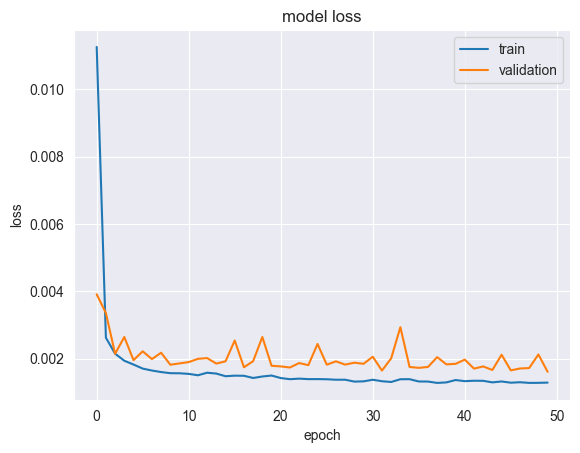

MSE between Preds  & True:  0.0018191450674884767
MSE between Open  & Close:  0.0020582171707751533


In [37]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

from sklearn.metrics import mean_squared_error

print('MSE between Preds  & True: ', mean_squared_error(predictions, y_finetuning_test))
print('MSE between Open  & Close: ',
      mean_squared_error(X_finetuning_test_scale[['HO_Pinnacle', 'DO_Pinnacle', 'AO_Pinnacle']], y_finetuning_test))

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


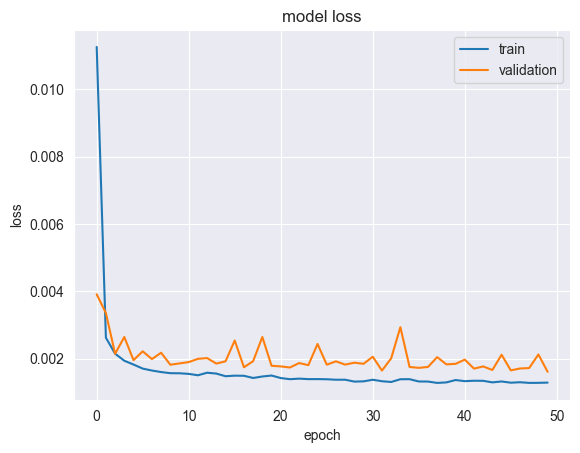

In [38]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

## Backtesting

In [47]:
from utils.BackTest import Evaluator, Games

open_percentage = Games(df_test["HO_Pinnacle"].array,
                        df_test["DO_Pinnacle"].array,
                        df_test["AO_Pinnacle"].array)

predictions = model.predict(X_finetuning_test_scale)
predicted_odds = Games(*predictions.T)
buy_sig = generate_buy_signals(open_percentage, predicted_odds, 0.05)
evaluate_buy_signals(df_test["FTHG"].array, df_test["FTAG"].array, open_percentage.get_odds(), buy_sig)

{'roi': 36.5,
 'bet_count': 93,
 'bet_winning': 49,
 'bet_loosing': 44,
 'win_percentage': 0.5268817204301075}

In [43]:
min(df_test["Date"]), max(df_test["Date"])

(Timestamp('2021-03-21 00:00:00'), Timestamp('2022-11-22 00:00:00'))

# Proof of concept
lets say we always predict the close correctly (we use the actual close)

In [195]:
open_percentage = Games(data_df["HO_Pinnacle"].array,
                        data_df["DO_Pinnacle"].array,
                        data_df["AO_Pinnacle"].array)

close_percentage = Games(data_df["HC_Pinnacle"].array,
                         data_df["DC_Pinnacle"].array,
                         data_df["AC_Pinnacle"].array)
buy_sig = generate_buy_signals(open_percentage, close_percentage)

evaluate_buy_signals(data_df["FTHG"].array, data_df["FTAG"].array, open_percentage.get_odds(), buy_sig)

{'roi': 3210.719999999994,
 'bet_count': 47593,
 'bet_winning': 18832,
 'bet_loosing': 28761,
 'win_percentage': 0.3956884415775429}

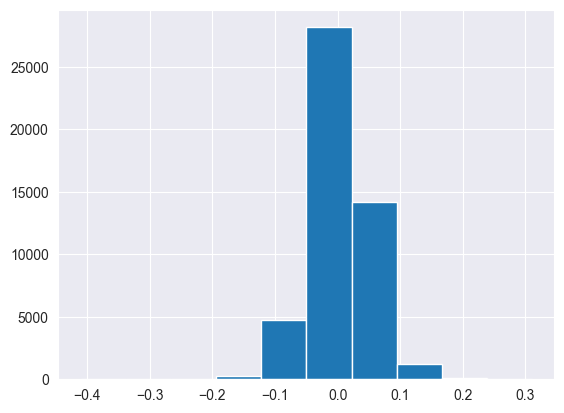

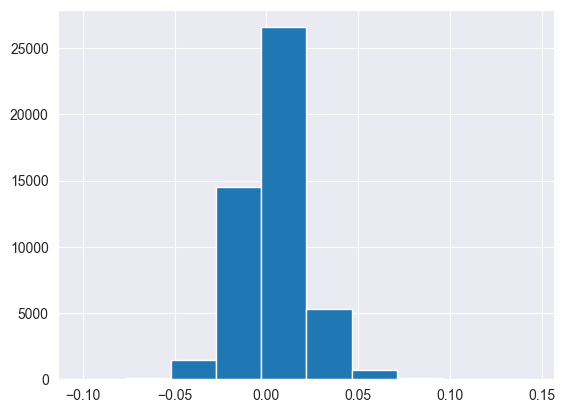

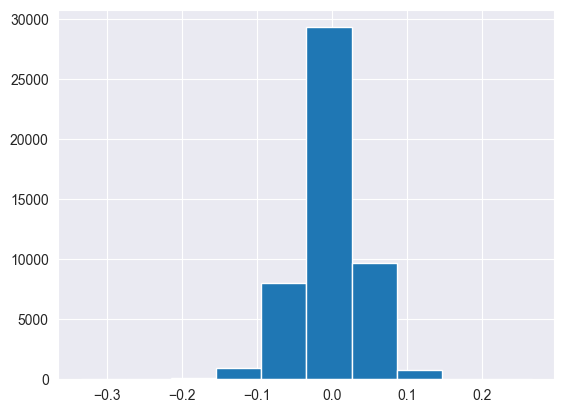

In [196]:
(data_df["HO_Pinnacle"] - data_df["HC_Pinnacle"]).hist()
plt.show()
(data_df["DO_Pinnacle"] - data_df["DC_Pinnacle"]).hist()
plt.show()
(data_df["AO_Pinnacle"] - data_df["AC_Pinnacle"]).hist()
plt.show()

## Betting heatmap

In [197]:
data_df = data_df_copy.copy()
# data_df = data_df[data_df["Date"] > pd.Timestamp(year=2019, month=1, day=1)]
data_df = data_df[pd.Timestamp(year=2021, month=1, day=1) < data_df["Date"]]
len(data_df)

8699

C:\Users\matfr\AppData\Local\Temp\ipykernel_8708\604117140.py:93: RuntimeWarning: invalid value encountered in longlong_scalars
  "win_percentage": winning_bets / total_spent


........

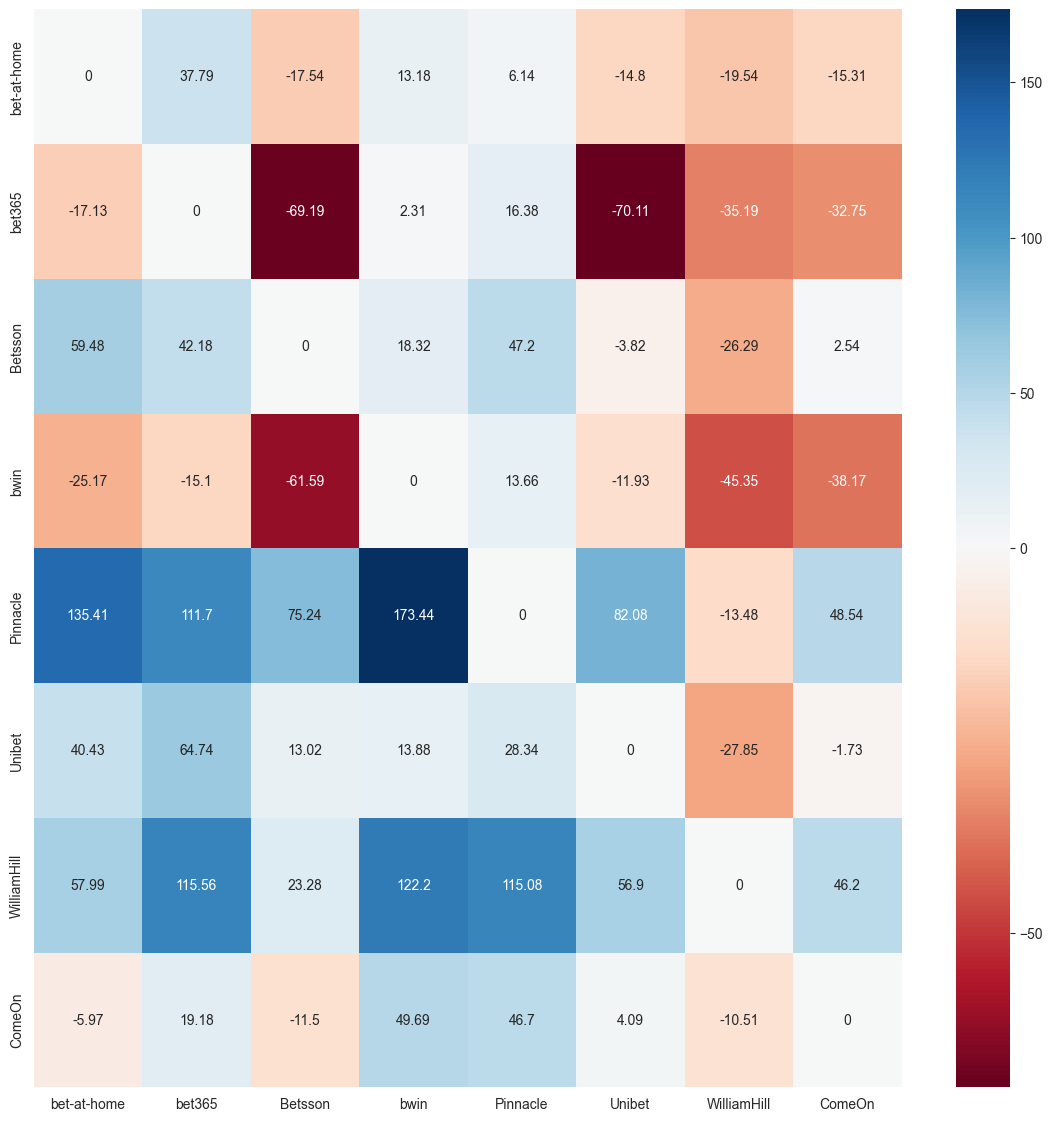

In [198]:


bet_names = ["bet-at-home", "bet365", "Betsson", "bwin", "Pinnacle", "Unibet", "WilliamHill", "ComeOn"]
prefix = "O"

bet_odds = [Games(
    data_df[f"H{prefix}_{name}"],
    data_df[f"D{prefix}_{name}"],
    data_df[f"A{prefix}_{name}"]) for name in bet_names]


def betting_heatmap(home_goals, away_goals, bet_odds, margin=0):
    res = np.zeros((len(bet_names), len(bet_names)))
    for i, betting_site in enumerate(bet_odds):
        for q, truth in enumerate(bet_odds):
            buy_sig = generate_buy_signals(betting_site, truth.get_normalized(), margin)
            res[i][q] = round(evaluate_buy_signals(home_goals, away_goals, betting_site.get_odds(), buy_sig)['roi'], 2)
        print(".", end="")

    plt.figure(figsize=(14, 14))

    vcenter = 0
    vmin, vmax = np.amin(res), np.amax(res)

    normalize = matplotlib.colors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)
    colormap = matplotlib.cm.RdBu

    ax = sns.heatmap(res, annot=True, xticklabels=bet_names, yticklabels=bet_names, fmt='g', cmap=colormap,
                     norm=normalize)


betting_heatmap(data_df["FTHG"].array, data_df["FTAG"].array, bet_odds, 0.03)

In [ ]:
b365 = Games(
    data_df[f"H{prefix}_bet365"],
    data_df[f"D{prefix}_bet365"],
    data_df[f"A{prefix}_bet365"])
pinnacle = Games(
    data_df[f"H{prefix}_Pinnacle"],
    data_df[f"D{prefix}_Pinnacle"],
    data_df[f"A{prefix}_Pinnacle"])
signals = generate_buy_signals(b365, pinnacle.get_normalized())
evaluate_buy_signals(data_df["FTHG"].array, data_df["FTAG"].array, b365.get_odds(), signals)